# ES(µ + λ) & ES(µ, λ) algorithms

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

%matplotlib inline

In [17]:
def mutation_function(x, σ, τ, τ_0):
    ε_0 = np.random.normal(0, τ_0*τ_0)
    for i in range(len(σ)):
        ε_i = np.random.normal(0, τ*τ)
        σ[i] *= np.exp(ε_i + ε_0)
    for i in range(len(x)):
        ε_i = np.random.normal(0, σ[i]*σ[i])
        x[i] = x[i] + ε_i
    return x, σ

def ESµ_plus_λ(chromosome_length, obj_fun, vmin, vmax, µ=100, λ=50, number_of_iterations=200, K=5):
    time0 = time.time()
    hist = np.zeros(number_of_iterations)
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    τ, τ_0 =  K/math.sqrt(2*chromosome_length), K/math.sqrt(2*math.sqrt(chromosome_length)),
    Pσ = np.zeros((µ, chromosome_length), dtype=np.float64)
    P = np.zeros((µ, chromosome_length), dtype=np.float64)
    for i in range(µ):
        P[i, :] = np.random.uniform(low=vmin, high=vmax, size=chromosome_length)
         Pσ[i, :] = np.zeros(chromosome_length, dtype=np.float64) + 1.0 #np.random.uniform(low=0.1, high=1, size=chromosome_length)
   # evaluating the objective function on the current population
    objective_values = np.zeros(µ)
    for i in range(µ):
        objective_values[i] = obj_fun(P[i, :])
        
    for t in range(number_of_iterations):
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(µ) / µ
        indices = np.random.choice(µ, λ, True, fitness_values).astype(np.int64)
        
        children_population = np.zeros((λ, chromosome_length), dtype=np.float64)
        children_σ = np.zeros((λ, chromosome_length), dtype=np.float64)
        #mutating parents
        for i in range(λ):
            children_population[i, :], children_σ[i, :] = mutation_function(P[indices[i]], Pσ[indices[i]], τ, τ_0)
                
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(λ)
        for i in range(λ):
            children_objective_values[i] = obj_fun(children_population[i, :])
            
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        P = np.vstack([P, children_population])
        Pσ = np.vstack([Pσ, children_σ])
        I = np.argsort(objective_values)
        P = P[I[:µ], :]
        Pσ = Pσ[I[:µ], :]
        objective_values = objective_values[I[:µ]]
        hist[t] = best_objective_value
        
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = P[0, :]

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, hist

def ESµ_λ(chromosome_length, obj_fun, vmin, vmax, µ=100, λ=200, number_of_iterations=200, K=5):
    time0 = time.time()
    hist = np.zeros(number_of_iterations)
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    τ, τ_0 =  K/math.sqrt(2*chromosome_length), K/math.sqrt(2*math.sqrt(chromosome_length)),
    Pσ = np.zeros((µ, chromosome_length), dtype=np.float64)
    P = np.zeros((µ, chromosome_length), dtype=np.float64)
    for i in range(µ):
        P[i, :] = np.random.uniform(low=vmin, high=vmax, size=chromosome_length)
        Pσ[i, :] = np.zeros(chromosome_length, dtype=np.float64) + 1.0
    # evaluating the objective function on the current population
    objective_values = np.zeros(µ)
    for i in range(µ):
        objective_values[i] = obj_fun(P[i, :])
        
    for t in range(number_of_iterations):
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(µ) / µ
        indices = np.random.choice(µ, λ, True, fitness_values).astype(np.int64)
        
        children_population = np.zeros((λ, chromosome_length), dtype=np.float64)
        children_σ = np.zeros((λ, chromosome_length), dtype=np.float64)
        #mutating parents
        for i in range(λ):
            children_population[i, :], children_σ[i, :] = mutation_function(P[indices[i]], Pσ[indices[i]], τ, τ_0)
                
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(λ)
        for i in range(λ):
            children_objective_values[i] = obj_fun(children_population[i, :])
            
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = children_objective_values
        P = children_population
        Pσ = children_σ
        I = np.argsort(objective_values)
        P = P[I[:µ], :]
        Pσ = Pσ[I[:µ], :]
        objective_values = objective_values[I[:µ]]
        hist[t] = best_objective_value
        
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = P[0, :]

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, hist

In [17]:
def griewank_function(x):
    return 1.0 + 1/4000.0 * np.sum([v*v for v in x]) - np.prod([np.cos(v / np.sqrt(i+1.0)) for i, v in enumerate(x)])

In [22]:
n = 50
griewank_best_chromosome, griewank_hist = ESµ_plus_λ(n, griewank_function, µ=2000, λ=2500, number_of_iterations=1000, vmin=-600, vmax=600, K=0.5)

  0     1.74478936 719.87952920 1297.48789422 1438.37973491 106.67175322
  1     3.17715454 718.99332151 1142.70507395 1249.51325140 100.08135288
  2     4.58497214 717.60029563 980.44457289 1120.22499623 129.53732425
  3     5.99910498 714.86687487 775.00587576 840.54758216  57.33674011
  4     7.39775944 713.93485239 719.97212023 722.36987919   1.65109185
  5     8.81048512 711.73719908 717.43083760 719.21601839   1.48194233
  6    10.20428824 706.50141678 714.92970932 716.89621579   1.60357885
  7    11.90813541 697.29350454 712.27215626 714.29219631   1.78629973
  8    13.31824517 692.19313307 709.14167027 711.62436828   2.52560681
  9    14.72525740 687.06521816 704.61055121 708.41576166   4.04484758
 10    16.10663915 683.16214727 697.27373067 703.16227400   4.48977054
 11    17.53265381 678.68313840 690.87314029 695.32564027   3.14176205
 12    18.95181656 675.56528275 686.23338918 689.45197804   2.45165437
 13    20.38147593 671.43980736 682.35907980 685.23273792   2.36062517
 

116   165.69760966   8.13988346  12.76630909  13.91947606   1.09778686
117   167.08894014   8.13988346  11.66086269  12.96711479   1.05833971
118   168.50589752   7.56992754  10.66889076  11.75856809   0.80080131
119   169.90780282   7.33702816  10.00868180  10.83601691   0.64616905
120   171.34606361   7.18665415   9.49477938  10.18350717   0.54452338
121   172.76579118   6.84988509   9.09081773   9.69719389   0.48973861
122   174.15957189   6.84988509   8.74236630   9.30235556   0.45444542
123   175.76375270   6.84988509   8.43124137   8.95201161   0.42098823
124   177.19801521   6.34379959   8.12663554   8.60813072   0.38241661
125   178.61326194   6.10067355   7.83771027   8.28427191   0.35807267
126   180.06337881   6.10067355   7.57246152   7.99120402   0.33947064
127   181.48803353   5.98129157   7.33452987   7.73404801   0.33495629
128   182.94820094   5.90801151   7.08606219   7.48263108   0.31492843
129   184.34035993   5.44037685   6.84997787   7.21984367   0.30017442
130   

232   329.88359261   0.96487219   1.02204573   1.03167693   0.00932985
233   331.28375745   0.96487219   1.01426986   1.02507126   0.01022281
234   332.68640137   0.95188032   1.00625395   1.01770894   0.01040117
235   334.09341025   0.94588840   0.99853634   1.01019982   0.01036833
236   335.47832394   0.92365838   0.99106874   1.00284924   0.01059214
237   336.86679745   0.90986583   0.98267818   0.99581307   0.01241624
238   338.33410501   0.89762957   0.97244954   0.98751959   0.01437269
239   339.75315833   0.89299869   0.96048865   0.97764419   0.01525182
240   341.19846869   0.88528964   0.94753858   0.96487219   0.01470721
241   342.59878254   0.85324902   0.93539926   0.95233362   0.01387527
242   344.02540588   0.80035271   0.92402036   0.94052773   0.01446258
243   345.43676162   0.80035271   0.91289501   0.92992078   0.01539932
244   346.85515690   0.78508495   0.90198235   0.92017665   0.01716250
245   348.29461622   0.78508495   0.88917684   0.90957921   0.01942525
246   

348   493.18529439   0.04473807   0.05588808   0.05880458   0.00240555
349   494.56434083   0.04473807   0.05378991   0.05667466   0.00233345
350   495.96102095   0.04406962   0.05164988   0.05435384   0.00211108
351   497.36259294   0.04321453   0.04966380   0.05212213   0.00179896
352   498.76371408   0.04156019   0.04805130   0.05009679   0.00160932
353   500.20859981   0.04062714   0.04660055   0.04848091   0.00148904
354   501.63945436   0.03870352   0.04529523   0.04699698   0.00134601
355   503.07934761   0.03870352   0.04404479   0.04565654   0.00125938
356   504.49669480   0.03730811   0.04294015   0.04438052   0.00119872
357   505.88200521   0.03502837   0.04183314   0.04331548   0.00126832
358   507.28954935   0.03502837   0.04067795   0.04218126   0.00125684
359   508.69351792   0.03364337   0.03959256   0.04107019   0.00123540
360   510.09987640   0.03364337   0.03850582   0.03996300   0.00115776
361   511.48833013   0.03224353   0.03755376   0.03889026   0.00102335
362   

464   656.91648269   0.00809792   0.00841185   0.00848562   0.00006443
465   658.32513309   0.00809792   0.00836550   0.00843705   0.00006236
466   659.76809669   0.00802843   0.00831853   0.00839251   0.00006203
467   661.14527035   0.00799126   0.00827516   0.00834598   0.00005911
468   662.53933120   0.00798372   0.00823125   0.00830211   0.00005838
469   663.93461752   0.00795296   0.00818982   0.00825614   0.00005484
470   665.34965420   0.00794226   0.00815313   0.00821610   0.00005075
471   666.74217081   0.00792512   0.00811868   0.00817772   0.00004760
472   668.17157054   0.00791626   0.00808627   0.00814208   0.00004456
473   669.57346487   0.00791420   0.00805722   0.00810890   0.00004120
474   670.99592304   0.00789995   0.00802971   0.00807944   0.00003775
475   672.40423107   0.00783729   0.00800495   0.00804854   0.00003368
476   673.76321626   0.00783722   0.00798347   0.00802342   0.00003196
477   675.16669297   0.00778680   0.00796314   0.00800174   0.00003145
478   

580   820.47617269   0.00741292   0.00741716   0.00741821   0.00000085
581   821.85765481   0.00741224   0.00741654   0.00741757   0.00000084
582   823.27895331   0.00741088   0.00741597   0.00741698   0.00000090
583   824.69582653   0.00741088   0.00741534   0.00741641   0.00000099
584   826.14010954   0.00741053   0.00741459   0.00741580   0.00000103
585   827.53772712   0.00740983   0.00741376   0.00741500   0.00000098
586   828.91869950   0.00740901   0.00741298   0.00741412   0.00000089
587   830.36522651   0.00740850   0.00741226   0.00741332   0.00000086
588   831.76377702   0.00740818   0.00741154   0.00741259   0.00000087
589   833.19653296   0.00740743   0.00741078   0.00741181   0.00000082
590   834.60559535   0.00740720   0.00741008   0.00741103   0.00000072
591   835.98225522   0.00740672   0.00740944   0.00741027   0.00000064
592   837.38526559   0.00740615   0.00740889   0.00740964   0.00000060
593   838.77135849   0.00740609   0.00740834   0.00740907   0.00000058
594   

696   983.49122977   0.00739623   0.00739630   0.00739632   0.00000002
697   984.88260031   0.00739622   0.00739629   0.00739631   0.00000002
698   986.30179977   0.00739622   0.00739628   0.00739630   0.00000002
699   987.71915483   0.00739622   0.00739626   0.00739628   0.00000001
700   989.12310314   0.00739621   0.00739625   0.00739627   0.00000001
701   990.53086376   0.00739621   0.00739625   0.00739626   0.00000001
702   991.91848135   0.00739621   0.00739624   0.00739625   0.00000001
703   993.34845376   0.00739620   0.00739623   0.00739624   0.00000001
704   994.74290109   0.00739620   0.00739623   0.00739624   0.00000001
705   996.13856506   0.00739619   0.00739622   0.00739623   0.00000001
706   997.54388976   0.00739619   0.00739622   0.00739623   0.00000001
707   998.94949746   0.00739618   0.00739621   0.00739622   0.00000001
708  1000.34102392   0.00739618   0.00739621   0.00739622   0.00000001
709  1001.74335504   0.00739618   0.00739620   0.00739621   0.00000001
710  1

812  1146.94326520   0.00739605   0.00739605   0.00739605   0.00000000
813  1148.33862281   0.00739605   0.00739605   0.00739605   0.00000000
814  1149.71227145   0.00739605   0.00739605   0.00739605   0.00000000
815  1151.11905599   0.00739605   0.00739605   0.00739605   0.00000000
816  1152.52976012   0.00739605   0.00739605   0.00739605   0.00000000
817  1153.91866565   0.00739605   0.00739605   0.00739605   0.00000000
818  1155.32622528   0.00739604   0.00739605   0.00739605   0.00000000
819  1156.71919203   0.00739604   0.00739605   0.00739605   0.00000000
820  1158.13315368   0.00739604   0.00739605   0.00739605   0.00000000
821  1159.53483939   0.00739604   0.00739605   0.00739605   0.00000000
822  1160.93396497   0.00739604   0.00739605   0.00739605   0.00000000
823  1162.32113147   0.00739604   0.00739604   0.00739605   0.00000000
824  1163.73677707   0.00739604   0.00739604   0.00739604   0.00000000
825  1165.13752604   0.00739604   0.00739604   0.00739604   0.00000000
826  1

928  1310.45512486   0.00739604   0.00739604   0.00739604   0.00000000
929  1311.84986162   0.00739604   0.00739604   0.00739604   0.00000000
930  1313.25800920   0.00739604   0.00739604   0.00739604   0.00000000
931  1314.71874094   0.00739604   0.00739604   0.00739604   0.00000000
932  1316.12761736   0.00739604   0.00739604   0.00739604   0.00000000
933  1317.51559997   0.00739604   0.00739604   0.00739604   0.00000000
934  1318.89340520   0.00739604   0.00739604   0.00739604   0.00000000
935  1320.30335236   0.00739604   0.00739604   0.00739604   0.00000000
936  1321.75448632   0.00739604   0.00739604   0.00739604   0.00000000
937  1323.15953851   0.00739604   0.00739604   0.00739604   0.00000000
938  1324.57055640   0.00739604   0.00739604   0.00739604   0.00000000
939  1325.96453500   0.00739604   0.00739604   0.00739604   0.00000000
940  1327.57658029   0.00739604   0.00739604   0.00739604   0.00000000
941  1328.95004869   0.00739604   0.00739604   0.00739604   0.00000000
942  1

[ 3.14002313e+00 -4.43844469e+00 -3.08037143e-07  1.04908640e-06
 -2.84513067e-06  7.42476918e-08 -1.91491141e-07  3.00278448e-06
  3.52174277e-06 -4.07879454e-06 -9.78880349e-07 -3.94061261e-06
 -4.46925096e-06  8.14093469e-07  1.30998159e-06  1.36384311e-06
  3.19813758e-06 -2.13771850e-06 -4.53587587e-06 -1.22558337e-06
  1.07578097e-06  5.81916428e-06  1.53878868e-06 -7.53483316e-06
  1.73638649e-06  6.47401309e-06 -6.41158007e-07  1.11604607e-06
  5.00589984e-05 -5.40669661e-06 -5.40965671e-06  1.02733919e-05
  3.35365698e-06  1.83501437e-05  2.93838597e-06 -1.23322176e-05
 -1.42492848e-06 -7.15342595e-06  2.10669245e-05  6.22226795e-06
  1.82028620e-07  5.57289977e-06  1.14107504e-06 -8.49201675e-07
  4.87356975e-06  6.92443584e-07 -2.75983454e-06 -1.49072455e-07
 -6.70162419e-06 -4.13576349e-05]


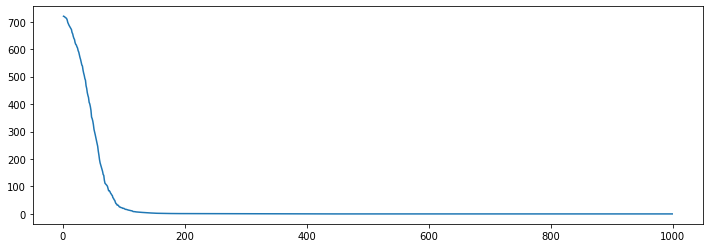

In [23]:
print(griewank_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(griewank_hist)
plt.show()

In [24]:
n = 50
griewank_best_chromosome, griewank_hist = ESµ_λ(n, griewank_function, µ=2000, λ=2500, number_of_iterations=1000, vmin=-600, vmax=600, K=0.5)

  0     1.84543538 865.63016535 1391.63456416 1602.58247790 141.86879308
  1     3.23636913 863.73567914 1249.65113357 1422.75857922 117.50034524
  2     4.61776686 861.76955694 1128.36592458 1278.25861350  99.97337603
  3     6.08035374 860.22104242 1034.19768291 1148.84668860  81.59497356
  4     7.47368956 855.51706576 946.57734339 1051.57751136  67.95542364
  5     8.88334680 854.53994539 880.57908826 948.58027875  30.40317208
  6    10.33334804 852.96463506 863.80651625 868.27864684   2.65112081
  7    11.75591946 849.69850736 861.33472469 864.77289903   2.42260043
  8    13.17967343 844.08070032 858.74763311 862.25735779   2.59524417
  9    14.57344890 838.31433763 855.82311505 859.67622039   2.92510254
 10    15.96787834 831.39793077 852.58024984 856.75584314   3.65441587
 11    17.35486007 828.41172027 847.78048420 853.57806300   4.88942728
 12    18.75895905 823.85603015 841.98978722 849.03322811   4.90142504
 13    20.17179418 820.11786306 836.75787686 843.03152998   4.393638

116   166.33048344  58.17223692  74.80444458  80.42392700   4.07390094
117   167.73855162  56.62276966  72.04834351  77.87484617   4.08775048
118   169.14183760  54.26490104  69.22317799  74.94360256   4.01509199
119   170.58695149  53.72205832  66.31290762  72.41593814   4.02801852
120   172.00744510  49.46398497  63.37564371  69.26026594   3.79296484
121   173.41402459  47.08657990  60.91336357  66.60073324   3.72547961
122   174.80792546  43.66738111  58.55707533  63.54013868   3.35109459
123   176.23422170  42.79976020  56.40447400  61.31353094   3.24929450
124   177.63862872  40.48104241  54.34481002  59.05919319   3.24291836
125   179.02677321  41.06917555  52.08428230  56.75565621   3.15458764
126   180.44476891  38.44223242  50.00879108  54.45254141   3.01435826
127   181.85254788  38.50091663  48.02318072  52.30286298   2.79710130
128   183.28263021  37.24335674  46.21497871  50.32543805   2.52963881
129   184.68492913  34.25112395  44.56503316  48.25919308   2.16686637
130   

232   330.06210017   1.77833413   2.11815040   2.24369795   0.08240302
233   331.49145007   1.78782676   2.07437118   2.20074816   0.08310592
234   332.92711830   1.75116851   2.03178604   2.15051517   0.07791564
235   334.34946084   1.64555593   1.99406448   2.10507962   0.07314953
236   335.77074671   1.63583586   1.95664906   2.06643938   0.07448031
237   337.18390918   1.62594163   1.91501193   2.02559131   0.07781010
238   338.57651830   1.59879807   1.86173131   1.97409157   0.07982230
239   340.00315595   1.59221314   1.80502965   1.91779873   0.07522480
240   341.42375588   1.55704925   1.75180044   1.85416771   0.06351712
241   342.82241154   1.54427813   1.71274777   1.79924111   0.05223015
242   344.22297668   1.52438993   1.68246529   1.75331351   0.04566485
243   345.62686014   1.48457947   1.65436930   1.71796556   0.04066957
244   347.03957391   1.47470899   1.63074180   1.69094182   0.04037726
245   348.45565414   1.42520188   1.60687446   1.66816807   0.04109711
246   

348   494.23250389   0.63847565   0.73660475   0.76965858   0.02285436
349   495.64065599   0.63469216   0.72536788   0.75766404   0.02151024
350   497.04079771   0.62129782   0.71394787   0.74604575   0.02258623
351   498.46084905   0.59632560   0.70154855   0.73483041   0.02299900
352   499.84406400   0.58873990   0.68857658   0.72046174   0.02267018
353   501.21638012   0.59192552   0.67654590   0.70921372   0.02291638
354   502.62283874   0.57198139   0.66404552   0.69868630   0.02366713
355   504.02805352   0.55364084   0.65171837   0.68457290   0.02261271
356   505.42120767   0.54118353   0.63872389   0.67235340   0.02269905
357   506.83094478   0.54124508   0.62618359   0.65888289   0.02171716
358   508.24296570   0.52955428   0.61464556   0.64672488   0.02116561
359   509.66621423   0.51629560   0.60255071   0.63327373   0.02048926
360   511.07531524   0.50130618   0.59114566   0.62143258   0.02048185
361   512.52712965   0.48222444   0.57900239   0.60932759   0.02176586
362   

464   658.14163089   0.06282486   0.07336579   0.07720611   0.00245837
465   659.52234149   0.06107617   0.07219162   0.07583986   0.00235820
466   660.91763091   0.06111731   0.07103046   0.07463663   0.00242862
467   662.32778955   0.05870838   0.06952185   0.07315320   0.00244020
468   663.72642851   0.05895306   0.06796531   0.07173201   0.00245446
469   665.13997316   0.05763550   0.06654531   0.07006626   0.00244578
470   666.55128074   0.05478271   0.06504990   0.06853860   0.00242435
471   668.00550628   0.05281488   0.06343843   0.06696292   0.00236592
472   669.39839840   0.05215562   0.06182251   0.06515946   0.00241786
473   670.79601169   0.05045249   0.06020581   0.06373865   0.00249555
474   672.20389557   0.04935515   0.05833310   0.06180907   0.00242031
475   673.58933926   0.04876288   0.05656215   0.05988403   0.00227127
476   674.98379326   0.04788283   0.05507273   0.05814229   0.00207828
477   676.37812924   0.04630073   0.05364220   0.05659884   0.00192595
478   

580   822.19744611   0.02169866   0.02204708   0.02222523   0.00011270
581   823.60025692   0.02162706   0.02198077   0.02213249   0.00009910
582   825.01003098   0.02163831   0.02192027   0.02205705   0.00008824
583   826.41729546   0.02157216   0.02187409   0.02200529   0.00008435
584   827.81119394   0.02147097   0.02182217   0.02195005   0.00008492
585   829.21837950   0.02143269   0.02176909   0.02189805   0.00008499
586   830.62980342   0.02144163   0.02172501   0.02185057   0.00008213
587   832.03122473   0.02137569   0.02167873   0.02179982   0.00007986
588   833.46146107   0.02129345   0.02163270   0.02175281   0.00007877
589   834.86894011   0.02127899   0.02158892   0.02170881   0.00008287
590   836.28516793   0.02122654   0.02154757   0.02166877   0.00008296
591   837.70885754   0.02122481   0.02150028   0.02162269   0.00007999
592   839.11109614   0.02120428   0.02145794   0.02157689   0.00007608
593   840.51922631   0.02115286   0.02141408   0.02152696   0.00007086
594   

696   985.92526174   0.01977298   0.01980242   0.01981457   0.00000815
697   987.34526539   0.01977157   0.01979847   0.01981093   0.00000791
698   988.74194765   0.01976129   0.01979486   0.01980616   0.00000742
699   990.17189336   0.01976183   0.01979165   0.01980289   0.00000730
700   991.57957721   0.01975537   0.01978819   0.01979915   0.00000775
701   992.98043370   0.01975257   0.01978444   0.01979556   0.00000779
702   994.39166999   0.01975378   0.01978082   0.01979172   0.00000743
703   995.81617713   0.01975158   0.01977762   0.01978804   0.00000693
704   997.22718024   0.01975145   0.01977508   0.01978501   0.00000651
705   998.61097622   0.01974893   0.01977244   0.01978218   0.00000652
706  1000.00778389   0.01974748   0.01977001   0.01978007   0.00000637
707  1001.43065500   0.01974782   0.01976731   0.01977746   0.00000615
708  1002.83517456   0.01974573   0.01976503   0.01977446   0.00000576
709  1004.24196649   0.01974173   0.01976290   0.01977160   0.00000526
710  1

812  1149.77818394   0.01969980   0.01970099   0.01970144   0.00000028
813  1151.18520856   0.01969985   0.01970090   0.01970135   0.00000029
814  1152.59140730   0.01969977   0.01970081   0.01970125   0.00000028
815  1154.05638504   0.01969973   0.01970071   0.01970113   0.00000027
816  1155.46712589   0.01969980   0.01970062   0.01970102   0.00000026
817  1156.90461135   0.01969948   0.01970053   0.01970093   0.00000025
818  1158.69516611   0.01969943   0.01970043   0.01970080   0.00000023
819  1160.17485857   0.01969943   0.01970034   0.01970069   0.00000023
820  1161.57213426   0.01969934   0.01970025   0.01970060   0.00000022
821  1163.01466203   0.01969940   0.01970018   0.01970050   0.00000021
822  1164.43582392   0.01969943   0.01970010   0.01970041   0.00000020
823  1165.84644318   0.01969940   0.01970003   0.01970033   0.00000019
824  1167.28159618   0.01969920   0.01969995   0.01970025   0.00000019
825  1168.82539392   0.01969923   0.01969987   0.01970015   0.00000018
826  1

928  1314.54855800   0.01969748   0.01969751   0.01969752   0.00000001
929  1315.93889213   0.01969747   0.01969750   0.01969752   0.00000001
930  1317.37073231   0.01969747   0.01969750   0.01969751   0.00000001
931  1318.77560997   0.01969747   0.01969750   0.01969751   0.00000001
932  1320.19114065   0.01969747   0.01969750   0.01969751   0.00000001
933  1321.60254049   0.01969747   0.01969749   0.01969750   0.00000001
934  1323.03711581   0.01969746   0.01969749   0.01969750   0.00000001
935  1324.44381285   0.01969746   0.01969749   0.01969750   0.00000001
936  1325.83156466   0.01969746   0.01969748   0.01969750   0.00000001
937  1327.23015022   0.01969746   0.01969748   0.01969749   0.00000001
938  1328.61000776   0.01969745   0.01969748   0.01969749   0.00000001
939  1329.99648857   0.01969745   0.01969748   0.01969749   0.00000001
940  1331.40233111   0.01969745   0.01969747   0.01969748   0.00000001
941  1332.81809545   0.01969744   0.01969747   0.01969748   0.00000001
942  1

[ 3.78940744e-06 -7.09413487e-05 -5.43324395e+00  1.17884877e-05
  7.00723963e+00 -3.86738131e-05 -7.64579650e-05 -3.08813471e-05
  5.37028331e-05 -1.29284530e-04  8.03875737e-05 -5.42323976e-05
  5.08188159e-05 -9.37258961e-05  2.61317921e-05 -1.03635151e-04
  2.82565387e-05  5.92843644e-05  3.06552730e-05  1.00333955e-04
  5.37288033e-05 -7.99995087e-05  6.19531695e-05  3.72750775e-05
 -1.77630923e-05  3.60966538e-06 -2.46622554e-04  3.84938819e-04
  9.83425314e-05  1.98047900e-04  1.88971022e-04 -2.35460851e-05
 -7.50042063e-06 -1.13808099e-04 -9.71738314e-05 -9.20938763e-06
 -1.99566150e-04  1.83530261e-04  2.56365653e-04 -1.98038975e-05
 -5.11907647e-04 -2.00025612e-04  3.29627468e-04 -4.61095730e-05
  6.09586983e-05  3.62608628e-04 -1.78682999e-05  4.01715407e-06
  3.49138409e-04  5.52063289e-05]


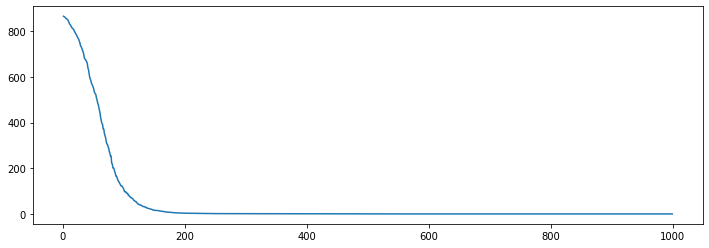

In [25]:
print(griewank_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(griewank_hist)
plt.show()

In [52]:
def ackley_function(x):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5*(1/len(x) * np.sum([v*v for v in x])))) - np.exp(1/len(x)*np.sum([np.cos(2.0*np.pi*v) for v in x])) + 20.0 + np.exp(1)

In [57]:
n = 40
ackley_best_chromosome, ackley_hist = ESµ_plus_λ(n, ackley_function, µ=10000, λ=12000, number_of_iterations=300, vmin=-15.0, vmax=30.0, K=0.5)

  0     6.32971144  15.97797145  18.74002247  19.15457647   0.35661418
  1    11.46986604  15.88641293  18.25240702  18.65222853   0.36023768
  2    16.57054496  15.77641632  17.75578153  18.18434644   0.38548563
  3    21.71369267  15.50039608  17.23424343  17.67478767   0.42695821
  4    27.15585399  15.10815877  16.63909689  17.16768326   0.37486727
  5    32.28186083  14.42879395  16.22582651  16.55143719   0.25056868
  6    37.54646325  14.26771338  15.95657214  16.22606183   0.22955882
  7    42.70349908  13.99878627  15.71184507  15.97853269   0.23543245
  8    47.83544588  13.79072215  15.46441292  15.74081938   0.25086144
  9    53.03076315  13.48746346  15.20999640  15.50213745   0.26020346
 10    58.22997999  13.39755518  14.95773874  15.25537887   0.26011289
 11    63.33429885  13.20108486  14.70813864  15.01361386   0.26657881
 12    68.42640138  12.61649903  14.44966107  14.76572189   0.27767946
 13    73.63163066  12.50293902  14.17550484  14.50473953   0.28853588
 14   

116   607.07648158   1.82940616   2.33948241   2.43379924   0.08469114
117   612.27356982   1.79369370   2.27007162   2.36711388   0.08275744
118   617.41678786   1.79369370   2.20180920   2.29479656   0.07741695
119   622.58800125   1.79369370   2.13933874   2.22528648   0.07290292
120   627.77710271   1.73528186   2.08206154   2.16275434   0.06770848
121   632.92431688   1.65923819   2.03126079   2.10670896   0.06196216
122   638.07099509   1.60939150   1.98714241   2.05710793   0.05810047
123   643.24543929   1.60939150   1.94596077   2.01240983   0.05742650
124   648.40882730   1.46162583   1.90539326   1.97103009   0.05787205
125   653.59878016   1.33919725   1.86275661   1.92958533   0.05980613
126   658.67012143   1.33919725   1.81860394   1.88565255   0.06052506
127   663.82515407   1.33919725   1.77421311   1.84131393   0.05951290
128   669.39276338   1.33919725   1.73157958   1.79754202   0.05805704
129   674.48412037   1.33919725   1.69191267   1.75622997   0.05583318
130   

232  1202.40060830   0.08598829   0.12540434   0.13430488   0.00759757
233  1207.47837710   0.08598829   0.11880541   0.12716589   0.00690526
234  1212.65698171   0.08303143   0.11314290   0.12078882   0.00616936
235  1217.79854584   0.08054533   0.10840624   0.11511715   0.00547139
236  1222.89668274   0.08054533   0.10439243   0.11059985   0.00506464
237  1228.02869844   0.07465496   0.10077320   0.10658480   0.00475217
238  1233.20554423   0.07335663   0.09739939   0.10290732   0.00453871
239  1238.32435369   0.07147307   0.09412546   0.09942208   0.00434350
240  1243.42513680   0.07147307   0.09109774   0.09610209   0.00408274
241  1248.50652957   0.06673046   0.08819686   0.09289376   0.00379922
242  1253.57434893   0.06659880   0.08557418   0.08995070   0.00363324
243  1258.64722300   0.06299427   0.08304143   0.08729990   0.00358056
244  1263.75922275   0.06241304   0.08050026   0.08468211   0.00346141
245  1268.91681767   0.05909347   0.07805518   0.08212058   0.00340269
246  1

[-0.00040612 -0.00122647  0.00245039 -0.00597972  0.00124253  0.00151739
  0.00137595  0.00507898  0.00593866 -0.00933669 -0.00213066 -0.00379376
 -0.00150343  0.00438444 -0.00040699 -0.0041313  -0.0015995  -0.00155548
  0.00132938  0.00585748 -0.00255682  0.00011594 -0.00308466 -0.00358094
  0.00369226  0.00177708 -0.00172604 -0.00408757  0.00032566  0.00051467
 -0.00222949  0.00272921 -0.00209401 -0.00325093 -0.00141301  0.00154404
  0.0004667  -0.00392505 -0.00144626 -0.00474803]


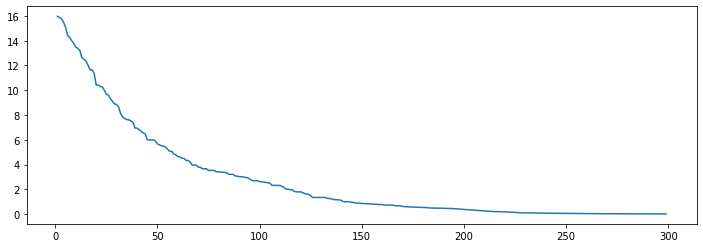

In [58]:
print(ackley_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(ackley_hist)
plt.show()

In [59]:
n = 40
ackley_best_chromosome, ackley_hist = ESµ_λ(n, ackley_function, µ=10000, λ=12000, number_of_iterations=300, vmin=-15.0, vmax=30.0, K=0.5)

  0     6.18652129  16.68296655  18.97864054  19.58016878   0.42252461
  1    11.31855059  16.53519198  18.61223980  19.18490199   0.40148800
  2    16.41502595  16.51682275  18.26861972  18.82057987   0.39678528
  3    21.61082721  16.14492854  17.93291421  18.48104213   0.40157858
  4    26.71844363  15.98210904  17.59279825  18.15714602   0.37342928
  5    31.82556629  15.87082404  17.30760201  17.80975509   0.32472093
  6    36.88125229  15.75762085  17.07076321  17.52470985   0.30216576
  7    42.09731412  15.30255035  16.86363020  17.30102532   0.29108969
  8    47.20064425  15.13889488  16.66941624  17.08483278   0.27751405
  9    52.47525406  14.92274900  16.48920059  16.89843784   0.28435475
 10    57.59308743  14.69822709  16.30402943  16.72811499   0.30402381
 11    62.72134447  13.99885022  16.08963538  16.54525801   0.33140135
 12    67.92132044  13.63490532  15.85858514  16.34182589   0.35241587
 13    73.09422731  13.63088329  15.61064383  16.11508015   0.35981799
 14   

116   604.46811366   2.57704734   3.04266827   3.19211727   0.09493253
117   609.69915199   2.43384307   3.01143586   3.15571967   0.09141171
118   614.77504587   2.47056610   2.98197917   3.12296164   0.09068567
119   619.83916020   2.42646212   2.95505622   3.09575844   0.09160226
120   625.04103351   2.35671574   2.92421970   3.06607542   0.09312616
121   630.16598511   2.38960191   2.89265306   3.03564209   0.09480724
122   635.30373144   2.39113477   2.86057915   3.00194640   0.09634756
123   640.45913506   2.33740014   2.82733467   2.97266355   0.09806925
124   645.61250615   2.19222927   2.78817834   2.93280593   0.09990002
125   650.68859935   2.18255885   2.74410001   2.89540191   0.10086261
126   655.86769342   2.18862148   2.70385509   2.85024441   0.09907105
127   661.09341669   2.19933474   2.66060258   2.80220721   0.09436277
128   666.24038386   2.13648203   2.62234732   2.76226026   0.09210664
129   671.40463352   2.13031552   2.58472731   2.72004830   0.09023931
130   

232  1203.86089969   0.44457201   0.48391069   0.49683584   0.00866931
233  1209.05180812   0.44504300   0.47947331   0.49228026   0.00830836
234  1214.14063191   0.44216373   0.47575669   0.48775139   0.00764743
235  1219.29174972   0.44239971   0.47251392   0.48407742   0.00744795
236  1224.45719695   0.44072576   0.46915274   0.48042690   0.00721900
237  1229.57094812   0.43597820   0.46581847   0.47659340   0.00689806
238  1234.68819857   0.43188483   0.46267136   0.47300183   0.00663412
239  1239.79180646   0.43066264   0.45929655   0.46919092   0.00620074
240  1244.99191594   0.42970564   0.45635693   0.46536297   0.00581889
241  1250.21067476   0.42776530   0.45340484   0.46185290   0.00548587
242  1255.27190399   0.42404417   0.45065179   0.45875784   0.00521695
243  1260.35259151   0.42517330   0.44821813   0.45591411   0.00497919
244  1265.50991488   0.42453455   0.44588639   0.45339090   0.00490369
245  1270.63143277   0.42406766   0.44377226   0.45107820   0.00467431
246  1

[-7.25489203e-09  1.98991224e+00 -1.98991224e+00  9.94958650e-01
 -9.94958640e-01 -1.16859699e-11 -2.98485570e+00 -9.94958633e-01
  9.94958658e-01  9.94958621e-01 -9.94958635e-01  1.09618699e-08
 -1.98991223e+00  2.62201664e-09 -1.37017132e-09  1.93578972e-09
  9.94958640e-01 -9.94958643e-01  9.94958641e-01 -9.94958636e-01
  2.13699353e-09  9.94958633e-01  8.85751086e-10 -2.28564805e-10
  9.94958637e-01 -1.98991224e+00  1.98991224e+00 -1.98991223e+00
  1.98991223e+00 -1.98991223e+00]


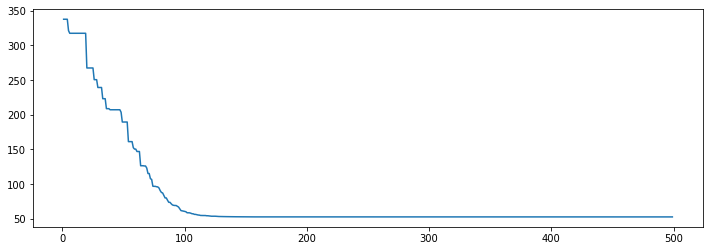

In [60]:
print(rastrigin_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(rastrigin_hist)
plt.show()

In [107]:
def dixon_price_function(x):
    return (x[0] - 1) * (x[0] - 1) + np.sum([i*(2.0*x[i]*x[i] - x[i-1])*(2.0*x[i]*x[i] - x[i-1]) for i in range(1, len(x))])

In [108]:
n = 40
dixon_price_best_chromosome, dixon_price_hist = ESµ_plus_λ(n, dixon_price_function, µ=11000, λ=14000, number_of_iterations=400, vmin=-10.0, vmax=10.0, K=0.5)

  0     6.77372074 1553704.01815909 5033736.83506198 6193389.98516399 833320.70008478
  1    12.60848212 1216341.04123565 4318985.62913097 5206283.45994834 667092.93898662
  2    18.31762910 999355.09779071 3795652.61423475 4539705.20360143 582007.15443694
  3    24.09916449 999355.09779071 3360426.55716033 4033028.32028947 521608.15897280
  4    29.86899495 786780.57743840 2985411.33715412 3587748.16532553 464641.50440732
  5    35.62725854 786780.57743840 2670436.96696825 3202605.09813036 417893.34164288
  6    41.43143082 786780.57743840 2393434.85191610 2878203.77126950 384142.83279908
  7    47.22982478 786780.57743840 2141345.71082025 2588510.38749251 342480.42791756
  8    52.95545340 786780.57743840 1917463.58236695 2315630.11250005 300135.34414021
  9    58.68821359 568247.48918275 1729983.12047981 2077655.73678407 263533.87279425
 10    64.42255807 568247.48918275 1569505.58559042 1878654.77499017 233707.91876952
 11    70.21954536 568247.48918275 1429595.69962020 1703278.071

108   633.13102031  16.11225666  23.06191166  24.99276196   1.52485352
109   638.89686227  15.59678590  21.46869421  23.13387635   1.26905550
110   644.67704606  14.91576058  20.20365816  21.58125301   1.08794137
111   650.39276457  14.10249792  19.17687553  20.40550023   0.99087304
112   656.19016504  13.46814295  18.26474167  19.40712752   0.95420432
113   661.98838711  11.69353208  17.35071065  18.49465539   0.96355871
114   667.73108816  11.69353208  16.41304961  17.54720121   0.93579570
115   673.48803544  10.92284678  15.51234198  16.57472328   0.85725400
116   679.16369510  10.04737600  14.68795358  15.66944380   0.80364410
117   684.91089678   9.20509360  13.90598605  14.84450685   0.77484726
118   690.62272692   9.20509360  13.13865307  14.03784920   0.74354480
119   696.52962875   8.91189237  12.36933666  13.24298247   0.71683412
120   702.25691366   8.21941186  11.65628798  12.45890956   0.65977658
121   708.08164811   7.63159355  10.99880737  11.75369334   0.61062598
122   

224  1303.54576063   0.69664687   0.72754891   0.73309261   0.00472765
225  1309.58240414   0.68945645   0.72347300   0.72890576   0.00468500
226  1315.30977416   0.68709311   0.71934178   0.72477818   0.00482220
227  1321.08054519   0.68645510   0.71508340   0.72059789   0.00501992
228  1326.87450123   0.68294856   0.71061552   0.71636774   0.00521811
229  1332.74634027   0.67970195   0.70579145   0.71180989   0.00524408
230  1338.42736864   0.67779524   0.70091370   0.70692811   0.00498489
231  1344.25413132   0.67340457   0.69645676   0.70211446   0.00456429
232  1350.02477860   0.66923996   0.69240627   0.69754375   0.00426462
233  1355.75012803   0.66790760   0.68856669   0.69347920   0.00403348
234  1361.47729158   0.66501469   0.68498123   0.68959744   0.00375794
235  1367.35815358   0.66148022   0.68166732   0.68594748   0.00353928
236  1373.12449646   0.65912647   0.67846154   0.68260073   0.00343917
237  1378.98411560   0.65745288   0.67541626   0.67934791   0.00322234
238  1

340  1974.90323901   0.55070704   0.55367342   0.55433069   0.00053182
341  1980.69188404   0.54967129   0.55309333   0.55369909   0.00051239
342  1986.50788593   0.54911986   0.55253547   0.55312614   0.00051819
343  1992.72875357   0.54878940   0.55197342   0.55258028   0.00053025
344  1998.55158901   0.54747827   0.55139659   0.55201073   0.00053865
345  2004.24718881   0.54740810   0.55081693   0.55142789   0.00055182
346  2009.98760486   0.54729123   0.55022923   0.55086531   0.00057223
347  2015.90480876   0.54621774   0.54961813   0.55028997   0.00058782
348  2021.75329757   0.54594317   0.54898371   0.54965823   0.00056747
349  2027.56201053   0.54510142   0.54839172   0.54901992   0.00051836
350  2033.27762365   0.54494868   0.54785107   0.54843906   0.00048863
351  2039.05158949   0.54455163   0.54734564   0.54790121   0.00048563
352  2044.82626104   0.54431860   0.54684556   0.54741635   0.00050010
353  2050.58069348   0.54401355   0.54633823   0.54691432   0.00049066
354  2

[ 6.57518207e-01 -3.33770835e-01 -1.88904678e-03  6.03303381e-03
  9.48237208e-04 -3.68687951e-03 -6.58957165e-04  2.17397331e-03
 -2.90233222e-03  7.98635814e-04 -9.70446556e-04  5.19336388e-04
  9.61697467e-04  2.50464519e-03  1.04587033e-03 -3.83809964e-04
 -2.87755426e-03 -1.83625343e-03 -1.39440496e-04 -1.26461314e-03
  2.80957562e-03 -6.95584127e-04 -1.63384430e-03 -5.61293224e-04
  4.82046869e-04 -1.37338107e-03 -2.38575237e-04  6.52351217e-04
  2.41461730e-03  1.05639928e-03 -1.89404979e-04 -8.97645341e-04
  9.70346539e-04 -2.45428547e-04 -6.97482845e-04  8.07950651e-04
 -4.66193058e-04  5.12648958e-03  4.99931349e-02  1.57209846e-01]


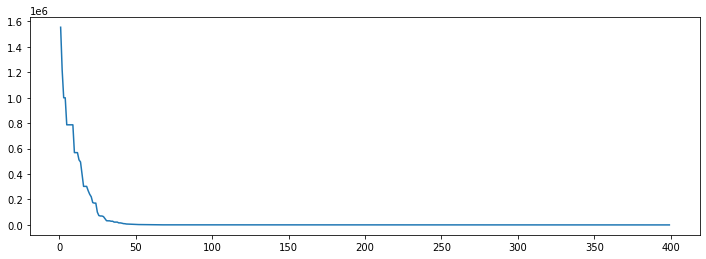

In [109]:
print(dixon_price_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(dixon_price_hist)
plt.show()

In [307]:
n = 40
dixon_price_best_chromosome, dixon_price_hist = ESµ_λ(n, dixon_price_function, µ=11000, λ=14000, number_of_iterations=400, vmin=-10.0, vmax=10.0, K=0.5)

  0     6.75060415 1767377.80067584 6126645.27785509 8412895.64104727 1321578.61511043
  1    12.48014331 1867762.07159927 5687510.52920521 7682414.54266349 1207949.07548370
  2    18.28069806 1449168.12186761 5297217.29691726 7161926.15347857 1134612.61643864
  3    23.95180678 1354137.91643037 4918485.12959548 6683438.94535994 1064415.83517601
  4    29.70100141 1234710.98754304 4577012.07078054 6222715.72332046 990534.83538800
  5    35.33885479 1182231.22329588 4246535.89635613 5826526.60500020 931140.29228830
  6    41.11604428 1111878.25048765 3937493.67512797 5402540.17658331 863921.26348404
  7    46.88045287 844775.34573386 3632368.57277113 4995489.48016804 805120.98959106
  8    52.66082120 807107.72941937 3353885.67074325 4621424.57611973 759961.00484124
  9    58.40842366 753820.39469552 3068081.76750388 4266401.40076353 712156.44610541
 10    64.19782209 789993.33930082 2781932.78733075 3878935.98764842 651800.92241342
 11    69.89833379 720464.16509697 2481390.19869568 34

105   608.97049141 214.17752400 362.38699027 420.92206579  37.14827398
106   614.73025632 214.83042953 341.46050326 395.41607301  34.11733067
107   620.46274686 198.50268686 323.56222768 373.38396476  31.45135266
108   626.25735331 201.96981366 307.43465152 354.02947846  29.26241845
109   632.04206538 183.06230269 291.98719116 334.37401664  26.54052953
110   637.76183271 176.93645208 278.69822388 318.06733030  24.89681927
111   643.50595617 165.50057012 266.17182105 303.18441814  23.22324815
112   649.26486659 164.98064218 254.23766943 288.25123690  21.44833077
113   654.99914002 163.30694428 243.68992595 275.44359334  20.31426940
114   660.72780037 152.21676817 233.78599573 263.03735704  18.64579836
115   666.48766065 151.23274093 224.55522096 252.39246818  18.00104240
116   672.17877603 150.91420648 215.66437749 242.28129559  17.23960638
117   677.88266802 141.03572033 206.39789159 231.75570387  16.22971758
118   683.58024693 137.69960614 197.46508336 221.30952381  14.89997423
119   

221  1274.18520117  18.93543671  22.00419655  23.10427203   0.72036375
222  1279.88783073  18.24964534  21.60478489  22.61803465   0.66702278
223  1285.68067241  18.31673041  21.22685567  22.16467079   0.63757769
224  1291.39112496  17.94090518  20.87046486  21.80003477   0.63945442
225  1297.16911364  17.11627757  20.51282285  21.45154008   0.63858180
226  1302.96120715  16.60493813  20.13871235  21.07235376   0.64321562
227  1308.63750601  16.33592748  19.76217236  20.70282327   0.65106765
228  1314.41724873  16.34388202  19.35901057  20.28321237   0.64041475
229  1320.13229322  16.10549374  18.97995547  19.88537917   0.63503495
230  1325.72633886  15.87163000  18.58494395  19.48042502   0.62276769
231  1331.43788338  15.37028188  18.21569421  19.07831856   0.58844410
232  1337.24905300  15.55794339  17.86109054  18.67832021   0.55636773
233  1342.94852567  15.25752161  17.53035644  18.32104538   0.53637201
234  1348.74047518  15.21919552  17.21666125  17.98111166   0.51991232
235  1

337  1938.92845178   1.59887948   1.88597811   1.97704796   0.06028386
338  1944.70176625   1.55327531   1.84988326   1.93424732   0.05579743
339  1950.43345881   1.55937714   1.81650585   1.89505933   0.05230396
340  1956.09664941   1.51489074   1.78631442   1.85935973   0.05065676
341  1961.85791779   1.47475826   1.75773765   1.82941900   0.05043028
342  1967.55274844   1.36337334   1.72739693   1.80006682   0.05179754
343  1973.40147614   1.33863461   1.69750099   1.77095197   0.05415566
344  1979.15961552   1.29503638   1.66479795   1.74285040   0.05725454
345  1984.88703322   1.27515917   1.63093386   1.71096177   0.05955889
346  1990.65277362   1.25675070   1.59633272   1.67891752   0.06225315
347  1996.39796090   1.20447243   1.56125889   1.64734184   0.06394726
348  2002.12012911   1.17668149   1.52943027   1.61939820   0.06568452
349  2007.80901241   1.18341450   1.49478454   1.58834328   0.06657966
350  2013.47287107   1.13171797   1.46277459   1.55692657   0.06464979
351  2

[ 3.46220076e-01  5.56586018e-02  6.33671859e-02 -2.08967721e-02
  2.14811839e-02 -2.75475211e-02  2.46008925e-02 -2.93762701e-03
 -1.71481297e-02  1.40525983e-03  7.59611960e-03 -2.29674634e-03
 -6.83890628e-03  2.13736888e-05 -5.00221875e-03  2.46642967e-02
 -7.89192979e-03 -1.55287032e-02 -1.19030756e-02  1.07433610e-02
 -5.48628806e-03  1.34762683e-02  8.31877370e-03  6.46696043e-03
  3.65975648e-03  8.43836576e-04 -6.42811122e-03 -1.28908610e-02
  1.12517425e-03 -7.96858313e-04  7.84335969e-03  1.69911452e-03
  4.11033599e-03  2.89052485e-03  2.03455637e-02  2.04560131e-03
  3.01788934e-02  1.38291359e-01  2.64196707e-01  3.61176455e-01]


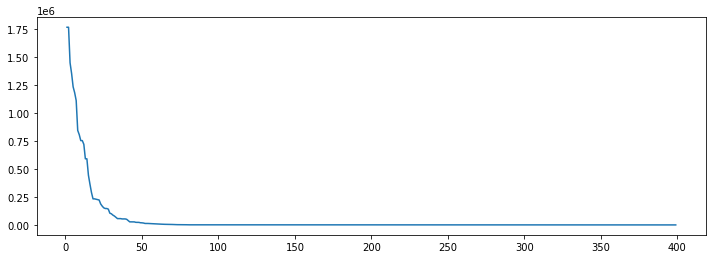

In [308]:
print(dixon_price_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(dixon_price_hist)
plt.show()

In [309]:
def levy_function(x):
    w = [1 + (v - 1.0) / 4.0 for v in x]
    return np.sin(np.pi * w[0])*np.sin(np.pi * w[0]) + np.sum([(w[i] - 1) * (w[i] - 1) *(1 + 10*np.sin(np.pi * w[i] + 1) * np.sin(np.pi * w[i] + 1))  for i in range(len(w)-1)]) + (w[len(w)-1]-1) * (w[len(w)-1]-1) * (1 + np.sin(2.0 * np.pi * w[len(w)-1]) * np.sin(2.0 * np.pi * w[len(w)-1]))

In [310]:
n = 40
levy_price_best_chromosome, levy_price_hist = ESµ_plus_λ(n, levy_function, µ=20000, λ=25000, number_of_iterations=400, vmin=-10.0, vmax=10.0, K=0.5)

  0    19.13228726 180.09148153 422.62577967 495.85914625  52.97560093
  1    33.77764082 180.09148153 378.84075464 435.68409509  43.31212354
  2    48.09745955 121.99088491 349.82837516 399.26657555  38.59746044
  3    62.39259624 121.99088491 327.31751538 372.43856534  35.79750681
  4    76.91000199 121.99088491 309.17376715 351.16596455  33.61465144
  5    91.18022966 121.99088491 293.01166164 333.46117463  32.32279208
  6   105.54042768 117.70514655 278.16165477 316.55098604  30.85028420
  7   119.93614268 117.70514655 264.47744912 301.20439071  29.55829735
  8   134.23444080 108.91401892 251.47145098 286.95877056  28.25576545
  9   148.62398720  90.36817556 238.86835137 272.73791694  26.96703390
 10   162.94398713  90.36817556 227.56015039 259.77272798  25.35772587
 11   177.36745453  90.36817556 217.23112033 247.42757365  23.87170213
 12   191.69307756  90.36817556 207.44266444 236.22494588  22.81818719
 13   206.18779063  90.36817556 198.23556267 225.68102662  21.54576435
 14   

116  1685.24363184   2.88161654   3.13898861   3.18748585   0.04143845
117  1699.66582632   2.82624679   3.11123723   3.15978378   0.04264668
118  1713.95439720   2.82281144   3.08037250   3.13070995   0.04425454
119  1728.26381135   2.80562004   3.04549476   3.09815530   0.04404070
120  1742.52656722   2.79954442   3.00890122   3.06023189   0.04112843
121  1756.81941772   2.76597655   2.97478637   3.02183247   0.03777169
122  1771.22105694   2.74728576   2.94400559   2.98745200   0.03519260
123  1785.55427718   2.72598417   2.91518401   2.95569263   0.03278536
124  1799.83634043   2.70382718   2.89013649   2.92695471   0.02981996
125  1814.20742035   2.69529915   2.86791306   2.90207943   0.02791994
126  1828.62143779   2.69529915   2.84721832   2.87982358   0.02695734
127  1843.05947447   2.66041102   2.82678593   2.85811082   0.02600350
128  1857.45271301   2.66041102   2.80707227   2.83727570   0.02525013
129  1871.79678631   2.60714425   2.78815282   2.81723450   0.02411900
130  1

232  3349.66183233   2.36162563   2.36195238   2.36201682   0.00005273
233  3363.85439014   2.36159775   2.36190436   2.36196495   0.00004974
234  3378.20757675   2.36157539   2.36185968   2.36191639   0.00004698
235  3392.45695210   2.36157539   2.36181828   2.36187206   0.00004391
236  3406.86153388   2.36152849   2.36178080   2.36183064   0.00004100
237  3421.13217235   2.36150414   2.36174714   2.36179405   0.00003862
238  3435.47556448   2.36150414   2.36171514   2.36175984   0.00003718
239  3449.74262714   2.36148838   2.36168451   2.36172745   0.00003578
240  3464.03512883   2.36146465   2.36165570   2.36169655   0.00003431
241  3478.32127357   2.36142253   2.36162798   2.36166777   0.00003317
242  3492.45175409   2.36142253   2.36160031   2.36163928   0.00003213
243  3506.80830669   2.36140834   2.36157265   2.36160999   0.00003112
244  3521.05125308   2.36137645   2.36154488   2.36158108   0.00003015
245  3535.39384890   2.36137124   2.36151771   2.36155209   0.00002788
246  3

348  5012.18132806   2.36113135   2.36113208   2.36113224   0.00000014
349  5026.51778102   2.36113125   2.36113195   2.36113210   0.00000013
350  5040.90185356   2.36113111   2.36113184   2.36113198   0.00000012
351  5055.28701520   2.36113102   2.36113172   2.36113187   0.00000012
352  5069.67886925   2.36113086   2.36113161   2.36113175   0.00000012
353  5083.98926902   2.36113086   2.36113150   2.36113164   0.00000012
354  5098.32454848   2.36113077   2.36113139   2.36113153   0.00000012
355  5112.75691581   2.36113068   2.36113128   2.36113141   0.00000012
356  5127.09491730   2.36113045   2.36113117   2.36113131   0.00000011
357  5141.45088959   2.36113033   2.36113107   2.36113120   0.00000011
358  5155.79339504   2.36113021   2.36113097   2.36113110   0.00000011
359  5170.09406042   2.36113021   2.36113087   2.36113100   0.00000011
360  5184.38898158   2.36113016   2.36113076   2.36113089   0.00000011
361  5198.84707379   2.36113007   2.36113066   2.36113078   0.00000010
362  5

[ 0.99999562  1.00002724  1.00003077  1.000091    0.99995728  1.00004238
 -4.2421361   3.6643744   1.00012071  0.99981458  1.00024118  1.00009887
  0.9999958   0.99998169  0.99992733  0.99989543  0.99990097  1.00012245
  1.00002804  0.99997977  1.00008763  1.00012463  1.00001082 -0.0929992
  1.0000682   0.99989262 -0.09313779  0.99995376  0.99990774  1.00005465
  1.00017305  0.99999327  1.00010246  1.00002823  0.99996513  1.00002971
  1.00004388  1.00001702  0.99995203  1.00390091]


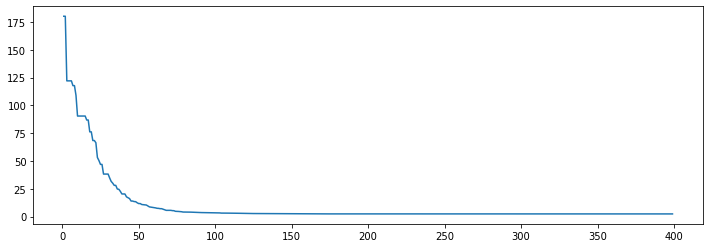

In [311]:
print(levy_price_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(levy_price_hist)
plt.show()

In [312]:
n = 40
levy_price_best_chromosome, levy_price_hist = ESµ_λ(n, levy_function, µ=20000, λ=25000, number_of_iterations=400, vmin=-10.0, vmax=10.0, K=0.5)

  0    19.20460558 184.54671108 482.53334573 611.63802403  77.39256744
  1    33.50633454 187.24620112 455.17424737 573.41614123  70.63463362
  2    47.69405031 153.45358426 438.00231612 553.65992295  68.74153592
  3    61.92854643 136.19223824 424.29823770 535.52364118  67.42928594
  4    76.21226072 153.59302115 409.08138503 520.51034263  66.58141240
  5    90.48307991 133.48147175 396.60646789 506.72514062  65.27354597
  6   104.71763086 127.26312638 383.65695878 492.91397641  64.09395558
  7   118.94730306 127.02463867 371.03808540 476.06951901  62.31062377
  8   133.32493091  90.89595946 358.23721968 463.62215539  61.61622535
  9   147.56893754 117.17603051 345.49637467 446.59572743  59.69252839
 10   161.73409462 117.99387982 332.70956352 429.53094094  57.60514321
 11   176.02776098 122.25974345 319.29544524 415.59623756  56.50599806
 12   190.46815324  75.98637816 305.60170998 397.95124150  54.70692522
 13   204.80140352  91.18418458 290.52796971 379.36583000  52.65781346
 14   

116  1679.62679124   2.36679627   2.89178515   3.08239157   0.12190240
117  1693.90797257   2.37406885   2.82882976   3.00853191   0.11407232
118  1708.27010083   2.33306757   2.76825588   2.93458303   0.10649519
119  1722.58959293   2.32807986   2.71308907   2.86837159   0.09932217
120  1736.93658972   2.31811705   2.65920803   2.80229264   0.09092204
121  1751.19139409   2.27801505   2.61094768   2.74124564   0.08209312
122  1765.34499311   2.28691540   2.56758499   2.68628458   0.07538351
123  1779.68040180   2.21365718   2.52790600   2.63576403   0.06886190
124  1793.93646026   2.18434915   2.49145620   2.59161562   0.06345393
125  1808.35452056   2.20116458   2.45987742   2.55177280   0.05886252
126  1822.57598901   2.14623840   2.43138623   2.51765348   0.05542626
127  1836.93597794   2.17466276   2.40451655   2.48544792   0.05185873
128  1851.26929307   2.15773183   2.37825936   2.45463073   0.04865167
129  1865.54206729   2.15522811   2.35397519   2.42545193   0.04560352
130  1

232  3339.95759797   1.46064603   1.47012058   1.47252662   0.00160230
233  3354.16737700   1.46109695   1.46936494   1.47171127   0.00156058
234  3368.42869759   1.46004132   1.46867314   1.47094997   0.00151519
235  3382.73665428   1.46070244   1.46797039   1.47022623   0.00149199
236  3396.91874862   1.45992061   1.46730010   1.46945807   0.00144230
237  3411.27126312   1.46013637   1.46663134   1.46877389   0.00139222
238  3425.58041883   1.45954473   1.46604077   1.46808258   0.00133479
239  3439.78802013   1.45897571   1.46548820   1.46747527   0.00130882
240  3454.31348538   1.45892391   1.46489361   1.46681947   0.00125083
241  3468.71193576   1.45818366   1.46436531   1.46620128   0.00120610
242  3483.03457594   1.45848533   1.46383617   1.46560858   0.00116449
243  3497.32923222   1.45807891   1.46330190   1.46500448   0.00112064
244  3511.43321061   1.45781912   1.46277781   1.46440908   0.00107549
245  3525.80866528   1.45776129   1.46226268   1.46384580   0.00104950
246  3

348  4995.30608797   1.45252657   1.45255199   1.45256064   0.00000553
349  5009.67550540   1.45252702   1.45254978   1.45255777   0.00000508
350  5024.05902672   1.45252583   1.45254785   1.45255545   0.00000485
351  5038.41255736   1.45252520   1.45254594   1.45255309   0.00000461
352  5052.63687992   1.45252218   1.45254405   1.45255099   0.00000447
353  5066.89602637   1.45252398   1.45254215   1.45254888   0.00000425
354  5081.26700330   1.45252253   1.45254051   1.45254670   0.00000395
355  5096.08639264   1.45252069   1.45253882   1.45254475   0.00000372
356  5110.31784797   1.45252054   1.45253725   1.45254267   0.00000345
357  5124.63276768   1.45252047   1.45253569   1.45254087   0.00000334
358  5138.91755509   1.45252069   1.45253410   1.45253899   0.00000316
359  5153.10356688   1.45251855   1.45253261   1.45253723   0.00000298
360  5167.34318280   1.45251812   1.45253116   1.45253552   0.00000280
361  5181.60007739   1.45251803   1.45252976   1.45253382   0.00000257
362  5

[ 1.0001169   0.99964195  1.00001783  1.00002808  1.00001796  3.66417473
  0.99986914  0.99977588  1.0003253   0.99972153  1.00015062  1.00034228
  1.00012932  1.00017197  3.66421986  0.99957078  1.00029682  0.99976722
  1.00027537  1.00037642  1.00017202  0.99941658  0.99931344 -0.09240624
  0.99987723  1.00019945  0.99953041  0.99984007  0.99940568  0.9998618
  1.00044592  0.99980445  1.00051542  0.99996708  1.00047482  1.00080347
  0.99973431  0.99975073  3.6641548   1.0041019 ]


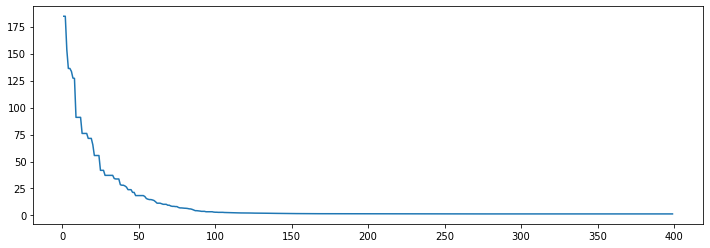

In [313]:
print(levy_price_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(levy_price_hist)
plt.show()

In [314]:
def rosenbrock_function(x):
    return np.sum([np.power(1.0 - x[i], 2) + 100.0 * np.power((x[i+1] - np.power(x[i], 2)), 2) for i in range(len(x)-1)])

In [315]:
n = 20
rosenbrock_best_chromosome, rosenbrock_hist = ESµ_plus_λ(n, rosenbrock_function, µ=20000, λ=22000, number_of_iterations=400, vmin=0, vmax=np.pi, K=0.5)

  0    10.00455403 3251.08472837 21997.92852650 31713.22917835 5696.74606281
  1    16.92558289 3251.08472837 21451.72482669 30157.20163283 5379.18409665
  2    23.95093846 3251.08472837 21191.23800583 29481.44127592 5247.31910954
  3    30.91670322 3251.08472837 21070.04595448 29140.41400851 5184.31348497
  4    37.80868196 3251.08472837 20994.01937685 28969.78425977 5145.93163560
  5    44.83041048 3251.08472837 20942.37957785 28845.21259314 5119.91008520
  6    51.75554538 3251.08472837 20910.83787954 28766.08585682 5102.27691863
  7    58.66043663 3251.08472837 20890.57325510 28697.51036673 5088.93989711
  8    65.59288692 3251.08472837 20870.56354649 28654.67245688 5081.88637392
  9    72.50835919 3251.08472837 20857.58181742 28633.08358335 5074.30187073
 10    79.48642659 3251.08472837 20848.16705789 28613.69105852 5070.82502592
 11    86.44088793 3251.08472837 20839.28554036 28585.93587906 5067.06664674
 12    93.48566198 3251.08472837 20834.32989228 28576.32836691 5065.00213035

107   752.34767008 3251.08472837 20766.86957673 28439.46220264 5032.23103218
108   759.28254151 3251.08472837 20766.86957673 28439.46220264 5032.23103218
109   766.17178679 3251.08472837 20766.86957673 28439.46220264 5032.23103218
110   773.12084126 3251.08472837 20766.86957673 28439.46220264 5032.23103218
111   779.98749089 3251.08472837 20766.86957673 28439.46220264 5032.23103218
112   786.82916355 3251.08472837 20766.86957673 28439.46220264 5032.23103218
113   793.74734569 3251.08472837 20766.40007066 28439.15481553 5031.95319952
114   800.67034960 3251.08472837 20766.11313056 28438.92156250 5031.67927935
115   807.53068137 3251.08472837 20766.11313056 28438.92156250 5031.67927935
116   814.51194286 3251.08472837 20766.11313056 28438.92156250 5031.67927935
117   821.42568970 3251.08472837 20766.11313056 28438.92156250 5031.67927935
118   828.35809970 3251.08472837 20766.11313056 28438.92156250 5031.67927935
119   835.35653305 3251.08472837 20766.11313056 28438.92156250 5031.67927935

214  1494.12338614 3251.08472837 20766.02415432 28438.11199380 5031.55208075
215  1501.08594298 3251.08472837 20766.02415432 28438.11199380 5031.55208075
216  1508.02491546 3251.08472837 20766.02415432 28438.11199380 5031.55208075
217  1514.90468454 3251.08472837 20766.02415432 28438.11199380 5031.55208075
218  1521.84963202 3251.08472837 20766.02415432 28438.11199380 5031.55208075
219  1528.82196546 3251.08472837 20766.02415432 28438.11199380 5031.55208075
220  1535.75178456 3251.08472837 20766.02415432 28438.11199380 5031.55208075
221  1542.62818146 3251.08472837 20766.02415432 28438.11199380 5031.55208075
222  1549.53858304 3251.08472837 20766.02415432 28438.11199380 5031.55208075
223  1556.44377327 3251.08472837 20766.02415432 28438.11199380 5031.55208075
224  1563.40843749 3251.08472837 20766.02415432 28438.11199380 5031.55208075
225  1570.30312467 3251.08472837 20766.02415432 28438.11199380 5031.55208075
226  1577.20810771 3251.08472837 20766.02415432 28438.11199380 5031.55208075

321  2235.66704035 3251.08472837 20766.02415432 28438.11199380 5031.55208075
322  2242.56142807 3251.08472837 20766.02415432 28438.11199380 5031.55208075
323  2249.51000857 3251.08472837 20766.02415432 28438.11199380 5031.55208075
324  2256.36743784 3251.08472837 20766.02415432 28438.11199380 5031.55208075
325  2263.21703076 3251.08472837 20766.02415432 28438.11199380 5031.55208075
326  2270.22951698 3251.08472837 20766.02415432 28438.11199380 5031.55208075
327  2277.13528943 3251.08472837 20766.02415432 28438.11199380 5031.55208075
328  2284.07773519 3251.08472837 20766.02415432 28438.11199380 5031.55208075
329  2291.01928735 3251.08472837 20766.02415432 28438.11199380 5031.55208075
330  2297.98128819 3251.08472837 20766.02415432 28438.11199380 5031.55208075
331  2304.86973763 3251.08472837 20766.02415432 28438.11199380 5031.55208075
332  2311.84517026 3251.08472837 20765.83738398 28435.70505243 5031.33661492
333  2318.70850229 3251.08472837 20765.83738398 28435.70505243 5031.33661492

[ 0.75302926  2.86333469  0.29080146  3.43294311  1.12789464  5.21940748
 -1.60740994 -1.40912564 -1.68715416  2.3689776  -0.02849648 -0.59582932
 -0.20872353 -1.45945651  0.49506559 -0.30038737  3.537859   -0.89215243
 -0.49035748  2.90877749]


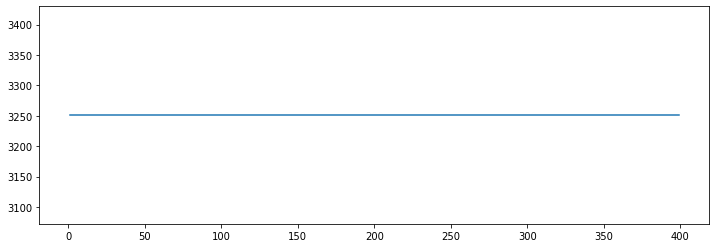

In [316]:
print(rosenbrock_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(rosenbrock_hist)
plt.show()

In [437]:
def pass_child(x, constrains, range_cons, progress, force=False, sc=False):
    if not range_cons(x):
        if force:
            return None
        else:
            return False
    l = sum([1 if f(x) else 0 for f in constrains])
    
    if l < len(constrains) - progress:
        return None
    return True
    
def ESµ_plus_λ_constrained(chromosome_length, obj_fun, vmin, vmax, constrain_funs, range_constrain, µ=100, λ=50, number_of_iterations=200, K=5, treshhold=0.1, force=False):
    time0 = time.time()
    hist = np.zeros(number_of_iterations)
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    τ, τ_0 =  K/math.sqrt(2*chromosome_length), K/math.sqrt(2*math.sqrt(chromosome_length))
    Pσ = np.zeros((µ, chromosome_length), dtype=np.float64)
    P = np.zeros((µ, chromosome_length), dtype=np.float64)
    biggest_change = np.Inf
    for i in range(µ):
        P[i, :] = np.random.uniform(low=vmin, high=vmax, size=chromosome_length)
        Pσ[i, :] = np.zeros(chromosome_length, dtype=np.float64) + 1.0 #np.random.uniform(low=0.1, high=1, size=chromosome_length)
    nP = []
    nPσ = []
    
    while len(nP) <= µ:
        
        for i in range(µ):
            P[i, :] = np.random.uniform(low=vmin, high=vmax, size=chromosome_length)
            Pσ[i, :] = np.zeros(chromosome_length, dtype=np.float64) + 1.0
        if pass_child(P[i, :], constrain_funs, range_constrain, 6, sc=True):
            nPσ.append(Pσ[i, :])
            nP.append(P[i, :])

    Pσ = np.array(nPσ)[:µ]
    P = np.array(nP)[:µ]
    
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(µ)
    for i in range(µ):
        objective_values[i] = obj_fun(P[i, :])
        
    tt = treshhold * 0.01
    treshhold = 6
    for t in range(number_of_iterations):
        if t % 4 == 0:
            treshhold -= 1.0
            if treshhold == 0:
                treshhold = 1
        if treshhold < 0:
            treshhold = 0
        valid_population = [P[0]]
        valid_population_σ = [Pσ[0]]

        bad_pop = []
        bad_pop_σ = []
        while (len(valid_population) + len(bad_pop)) <= 10*λ:
 
            # selecting the parent indices by the roulette wheel method
            fitness_values = objective_values.max() - objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(µ) / µ
            indices = np.random.choice(µ, λ, True, fitness_values).astype(np.int64)

            children_population = np.zeros((λ, chromosome_length), dtype=np.float64)
            children_σ = np.zeros((λ, chromosome_length), dtype=np.float64)
            #mutating parents
            for i in range(λ):
                children_population[i, :], children_σ[i, :] = mutation_function(P[indices[i]], Pσ[indices[i]], τ, τ_0)
                cons_res = pass_child(children_population[i, :], constrain_funs, range_constrain, treshhold, force)
                if cons_res:
                    valid_population.append(children_population[i, :])
                    valid_population_σ.append(children_σ[i, :])
                elif cons_res == False:
                    bad_pop.append(children_population[i, :])
                    bad_pop_σ.append(children_σ[i, :])
        
        # evaluating the objective function on the children population
        valid_population = np.array(valid_population)
        valid_population_σ = np.array(valid_population_σ)
        bad_pop = np.zeros(len(bad_pop)+1)#np.array(bad_pop)
        bad_pop_σ = np.zeros(len(bad_pop)+1)#np.array(bad_pop_σ)
        bad_pop_values = np.zeros(len(bad_pop)+1)
        valid_population_values = np.zeros(len(valid_population_σ))
                                           
        for i in range(len(valid_population_σ)):
            valid_population_values[i] = obj_fun(valid_population[i, :])
        '''
        for i in range(len(bad_pop)):
            bad_pop_values[i] = obj_fun(bad_pop[i, :])

        I = np.argsort(bad_pop_values)
        bad_pop = bad_pop[I, :]
        bad_pop_σ = bad_pop_σ[I, :]
        '''
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, valid_population_values])#, bad_pop_values[:int(λ * treshhold)]])
        P = np.vstack([P, valid_population])#, bad_pop[:int(λ * treshhold)]])
        Pσ = np.vstack([Pσ, valid_population_σ])#, bad_pop_σ[:int(λ * treshhold)]])
        I = np.argsort(objective_values)
        P = P[I[:µ], :]
        Pσ = Pσ[I[:µ], :]
        objective_values = objective_values[I[:µ]]
        
        curr_best = np.Inf
        cb = None
        for i in range(len(objective_values)):
            if pass_child(P[i, :], constrain_funs, range_constrain, t, True):
                curr_best = objective_values[i]
                cb = P[i, :]
                break
        hist[t] = best_objective_value
        
        # recording some statistics
        if curr_best < best_objective_value:
            if pass_child(cb, constrain_funs, range_constrain, 1, True):
                best_objective_value = curr_best
                best_chromosome = cb.copy()
            
        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, curr_best, objective_values.mean(), objective_values.max(), objective_values.std()))
    return best_chromosome, hist


In [406]:
def g2_function(x):
    return -(abs((np.sum([np.power(np.cos(v), 4) for v in x]) - 2.0 * np.prod([np.power(np.cos(v) ,2) for v in x])) / np.sqrt(np.sum([x[i] * x[i] * (i + 1) for i in range(len(x))]))))

In [407]:
def g1_constrain(x):
    return (-(np.prod(x)) + 0.75) <= 0
def g2_constrain(x):
    return (np.sum([v for v in x]) - 7.5 * len(x)) <= 0
def g_constrain_val(x):
    return False if False in [(v >= 0 and v <= 10) for v in x] else True
constraints_g2 = [g1_constrain, g2_constrain]

In [431]:
n = 20
g1_best_chromosome, g1_hist = ESµ_plus_λ_constrained(n, g2_function, range_constrain=g_constrain_val, µ=5000, λ=6000, number_of_iterations=100, vmin=0.0, vmax=10.0, K=0.5, constrain_funs=constraints_g2)

KeyboardInterrupt: 

In [ ]:
pass_child(g1_best_chromosome, constraints_g2, g_constrain_val, 0)
print(g1_constrain(g1_best_chromosome), g2_constrain(g1_best_chromosome))
print(g1_best_chromosome)

True True
[6.23389804 3.04599007 3.14803688 3.24048796 2.90704914 1.57827874
 3.20183049 0.51746903 3.22352096 0.1052521  2.68256453 2.99952594
 0.35775452 0.10317309 0.07320576 2.71760912 3.16082768 0.183518
 0.18252748 0.55962813]


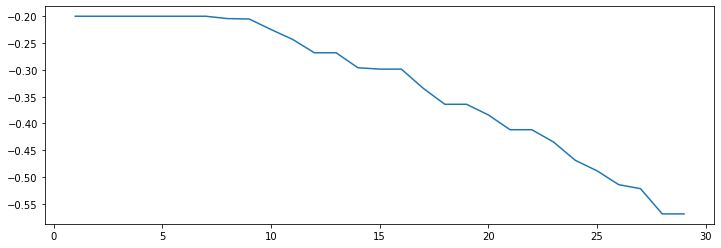

In [268]:
print(g1_constrain(g1_best_chromosome), g2_constrain(g1_best_chromosome))
print(g1_best_chromosome)
plt.figure(figsize=(12,4))
plt.plot(g1_hist)
plt.show()

In [378]:
def g7function(x):
    return np.power(x[0],2) + np.power(x[1], 2) + x[0] * x[1] - 14*x[0] - 16*x[1] + np.power(x[2] - 10 , 2)+4*np.power(x[3]-5,2)+np.power(x[4]-3, 2) + 2 * np.power(x[5] - 1,2) + 5 * np.power(x[6], 2) + 7 * np.power(x[7] - 11, 2) + 2*np.power(x[8]-10, 2) + np.power(x[9] - 7, 2) + 45

In [379]:
def g7_constrain_val(x):
    return False if False in [(v >= -10.0 and v <= 10.0) for v in x] else True

constraints_g7 = [
    lambda x: (4.0*x[0]+5.0*x[1]-3.0*x[6]+9.0*x[7]-105.0) - 1.e-05 <= 0,
    lambda x: (10*x[0]-8*x[1]-17*x[6]+2*x[7]) - 1.e-05<= 0,
    lambda x: (-8*x[0]+2*x[1]+5*x[8]-2*x[9]-12) - 1.e-05<= 0,
    lambda x: (3.0*np.power(x[0]-2, 2)+4.0*np.power(x[1]-3,2)+2.0*np.power(x[2], 2)-7.0*x[3]-120.0) - 1.e-04 <= 0,
    lambda x: (5*np.power(x[0],2)+8*x[1]+np.power(x[2]-6,2)-2*x[3]-40) - 1.e-05<= 0,
    lambda x: (0.5*np.power(x[0]-8, 2)+2*np.power(x[1]-4,2)+3*np.power(x[4], 2)-x[5]-30) - 1.e-05<= 0,
    lambda x: (np.power(x[0],2)+2*np.power(x[1]-2,2)-2*x[0]*x[1]+14*x[4]-6*x[5]) - 1.e-05<= 0,
    lambda x: (-3*x[0]+6*x[1]+12*np.power(x[8]-8,2)-7*x[9]) - 1.e-05<= 0
]

In [432]:
best = [10, 10, 10, 10, 10, 10, 10, 10, 10, -10]
print(g7function(best))
print([f(best) for f in constraints_g7])

1152
[False, True, True, False, False, False, False, False]


In [438]:
n = 10
g3_best_chromosome, g3_hist = ESµ_plus_λ_constrained(n, g7function, range_constrain=g7_constrain_val, µ=200, λ=200, number_of_iterations=100, vmin=-9.0, vmax=9.0, K=1, constrain_funs=constraints_g7, force=True)

  0     0.98015714          inf 834.73363691 1039.33094574 148.57623263
  1     1.61622834          inf 450.35297689 518.57221481  46.02264968
  2     2.03577638 371.67495976 359.07233410 386.43407400  26.30641314
  3     2.62890315 237.29879726 295.17780951 330.08887620  30.21104839
  4     3.22878242 158.45550750 223.02713800 243.49035574  24.66292053
  5     3.75059557 101.45582920 152.59068532 158.77737650   8.96064371
  6     4.22319770  75.49326453 118.17925041 130.68694863   8.99371358
  7     4.66411448  51.07655065  87.10484326  99.73789561  12.95654456
  8     5.47165990  27.00157570  48.93390551  53.55054104   5.84566591
  9     6.01766300  25.16065951  31.34998816  34.15049701   2.04265651
 10     6.51992607  18.34650564  25.96144110  28.06135652   1.70278643
 11     7.10577202  13.59474998  21.45412987  23.13192872   1.63677996


KeyboardInterrupt: 

In [414]:
print(g3_hist)

[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf]


In [298]:
np.random.rand()

0.8817260517732549